<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


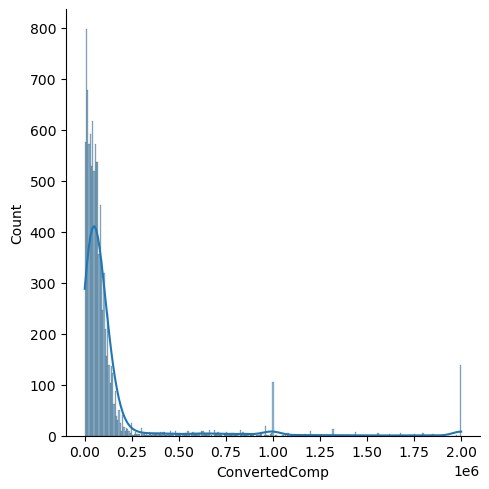

In [4]:
# your code goes here
import seaborn as sns 
sns.displot(df['ConvertedComp'], kde = True)

Plot the histogram for the column `ConvertedComp`.


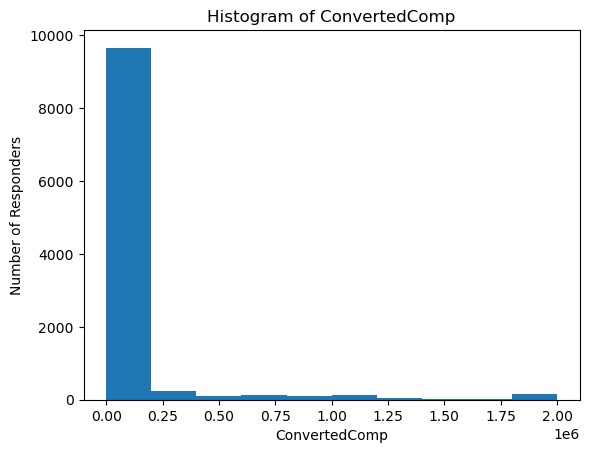

In [6]:
# your code goes here
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df['ConvertedComp'])
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Number of Responders')
plt.show()

What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
median_con = df['ConvertedComp'].median()
print("Median of ConvertedComp:", median_con)

Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here
df['Gender'].value_counts()['Man']

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# your code goes here
median_woman = df.loc[df['Gender'] == 'Woman', 'ConvertedComp'].median()
print("Median of ConvertedComp for Women:", median_woman)

Median of ConvertedComp for Women: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


(array([2.094e+03, 5.337e+03, 2.557e+03, 8.420e+02, 2.250e+02, 4.900e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

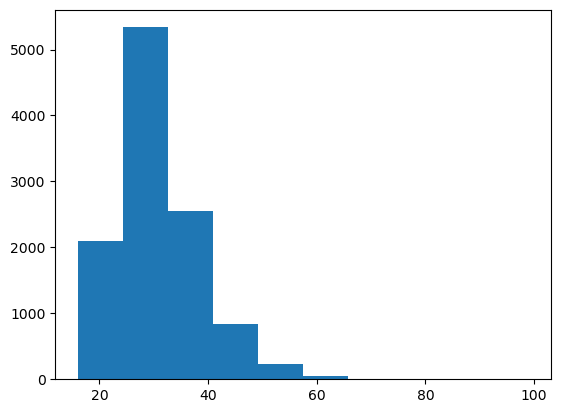

In [12]:
# your code goes here
plt.hist(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


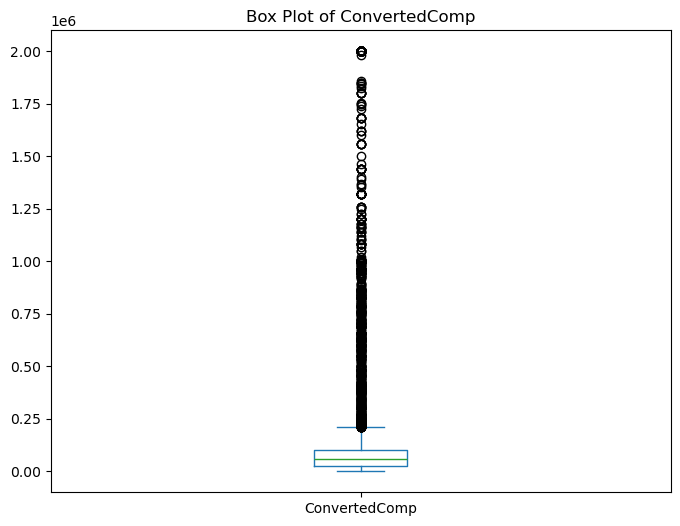

In [17]:
# your code goes here
df_cv = pd.DataFrame(data=df['ConvertedComp'])
df_cv.plot(kind='box', figsize=(8,6), title = 'Box Plot of ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [19]:
# your code goes here
upper = Q3+(IQR*1.5)
lower = Q1-(IQR*1.5)

print('Upper bound: ', upper)
print('Lower bound: ', lower)

Upper bound:  209698.0
Lower bound:  -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
# your code goes here
(df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)

0        False
1        False
2        False
3         True
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool

In [45]:
num_outliers = 0

for conv_comp in df['ConvertedComp']:
    if (conv_comp < lower) or (conv_comp > upper):
        num_outliers = num_outliers + 1

print("Number of Outliers ", num_outliers)

Number of Outliers  879


what is the median `ConvertedComp` before removing outliers.


In [52]:
df['ConvertedComp'].quantile(0.5)

57745.0

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [49]:
outl_index = df[(df.ConvertedComp < lower) | (df.ConvertedComp > upper)].index

df_outl = df.drop(outl_index)
df_outl.shape

(10519, 86)

In [51]:
df_outl.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,z_score
count,10519.000000,9.710000e+03,9703.000000,10402.000000,8277.000000,10250.000000,9703.000000
mean,12488.961023,7.243963e+05,59883.208389,41.895813,4.809352,30.647298,-0.243273
std,7235.797316,7.184433e+06,43394.336755,24.301665,4.636411,7.352928,0.147206
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000,-0.446414
25%,6257.500000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000,-0.364795
50%,12483.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000,-0.267627
75%,18789.500000,1.150000e+05,85574.500000,43.000000,5.000000,34.000000,-0.156121
max,25142.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000,0.263782


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [47]:
# your code goes here
df.corr()

ValueError: could not convert string to float: 'I am a developer by profession'

In [40]:
import pandas as pd
import numpy as np

# Load the dataset (assuming you already have it loaded)
# df = pd.read_csv("your_dataset.csv")

# Calculate the z-score
mean = df['ConvertedComp'].mean()
std = df['ConvertedComp'].std()
df['z_score'] = (df['ConvertedComp'] - mean) / std

# Remove outliers (z-score > 3)
df_cleaned = df[abs(df['z_score']) <= 3]

# Calculate the median of the cleaned data
median_cleaned = df_cleaned['ConvertedComp'].median()

# Print the result
print(f"Median ConvertedComp after removing outliers: {median_cleaned:.2f}")


Median ConvertedComp after removing outliers: 57000.00


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
